In [2]:
import sys
import torch
import matplotlib.pyplot as plt
from captum.attr import Saliency

sys.path.append("..")
from lib import models

/Users/guilherme/miniforge3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
discriminator = models.Discriminator28(channels=1, feature_maps=64)
generator = models.Generator28(noise_dim=100, channels=1, feature_maps=64)

discriminator.load_state_dict(torch.load('/Users/guilherme/Documents/Doutorado/Sources/xgan/weights/xdcgan/mnist/disc_epoch_9.pth'))
generator.load_state_dict(torch.load('/Users/guilherme/Documents/Doutorado/Sources/xgan/weights/xdcgan/mnist/gen_epoch_9.pth'))

<All keys matched successfully>

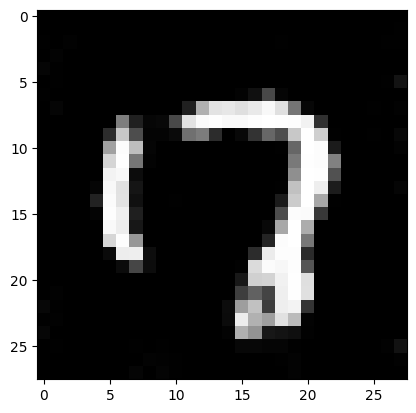

In [4]:
batch_size = 2
noise = torch.randn(batch_size, 100, 1, 1)
fake = generator(noise)
plt.imshow(fake[0].cpu().detach().squeeze().numpy(), cmap=plt.cm.gray)

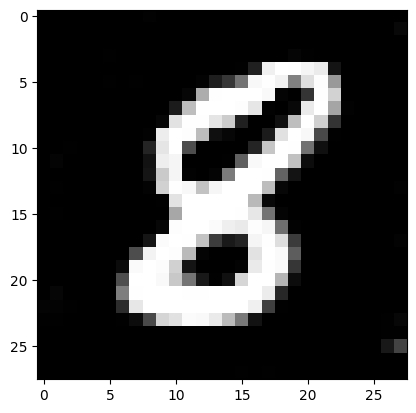

In [5]:
plt.imshow(fake[1].cpu().detach().squeeze().numpy(), cmap=plt.cm.gray)

In [6]:
output = discriminator(fake.detach())
print(output.detach())

cross_entropy = torch.nn.BCELoss()
loss = cross_entropy(output, torch.tensor([1., 1.]))
print(loss.detach())

tensor([0.2063, 0.4064])
tensor(1.2394)


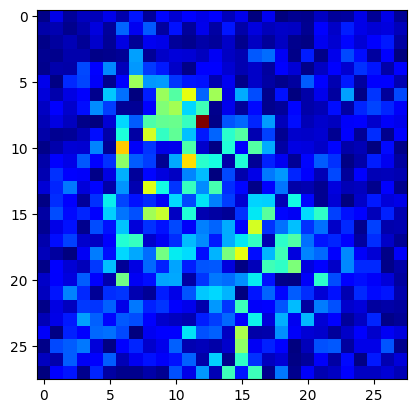

In [7]:
saliency = Saliency(discriminator)
explanations = saliency.attribute(fake)
plt.imshow(explanations[0].cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)

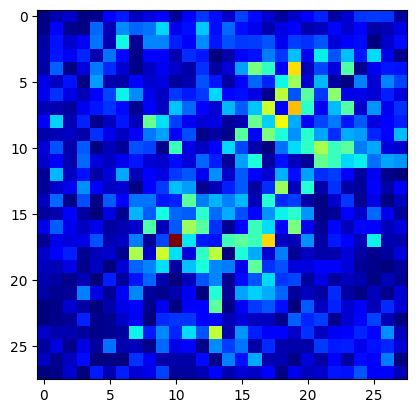

In [8]:
plt.imshow(explanations[1].cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)

In [11]:
fooled = (output > 0.6).float().reshape((2, 1, 1, 1))

back = fooled * explanations
print(back)


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
